In [61]:
import pandas as pd
import tensorflow as tf 
import matplotlib as plt 

In [62]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
insurance_one_hot = pd.get_dummies(insurance,dtype=int)

In [64]:
X = insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
import keras
from keras import layers
from keras import Sequential

tf.random.set_seed(42)

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [68]:
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [72]:
history =  model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 4888.4448 - mae: 4888.4448
Epoch 2/100
34/34 [==============================] - 0s 1000us/step - loss: 4810.7036 - mae: 4810.7036
Epoch 3/100
34/34 [==============================] - 0s 970us/step - loss: 4733.9092 - mae: 4733.9092
Epoch 4/100
34/34 [==============================] - 0s 894us/step - loss: 4651.8750 - mae: 4651.8750
Epoch 5/100
34/34 [==============================] - 0s 909us/step - loss: 4566.8398 - mae: 4566.8398
Epoch 6/100
34/34 [==============================] - 0s 879us/step - loss: 4489.0356 - mae: 4489.0356
Epoch 7/100
34/34 [==============================] - 0s 915us/step - loss: 4394.2080 - mae: 4394.2080
Epoch 8/100
34/34 [==============================] - 0s 940us/step - loss: 4309.8926 - mae: 4309.8926
Epoch 9/100
34/34 [==============================] - 0s 879us/step - loss: 4243.6846 - mae: 4243.6846
Epoch 10/100
34/34 [==============================] - 0s 881us/step - loss: 4156.39

In [73]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3495.3792 - mae: 3495.3792


[3495.379150390625, 3495.379150390625]

Text(0.5, 0, 'epochs')

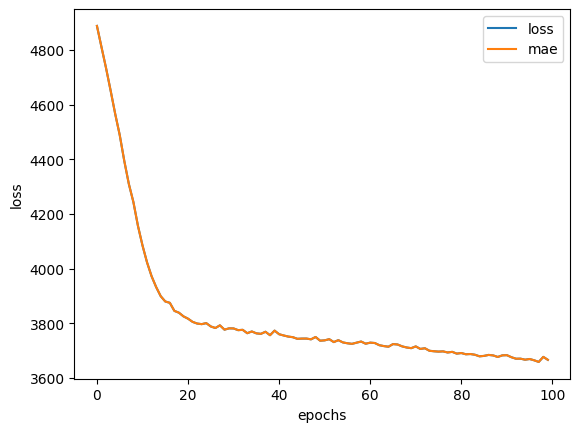

In [82]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

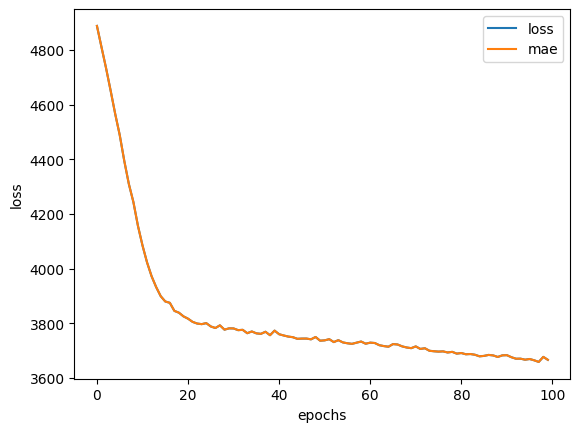

In [81]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")